# Titanic Project

#### Introduction

In [1]:
#import all the required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

### Loading and Checking The data

In [2]:
#import the data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#to check column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#info about the data shape of data,type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#to check for duplicated values
df.duplicated().sum()

0

In [6]:
#to find null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#drop categorical features'PassengerId','Name','Ticket'as they do not contribute in target variable.
#dropping 'Cabin' as it has 687 null values
cat_feat = ['PassengerId','Name','Ticket','Cabin']
df.drop(cat_feat,axis=1,inplace=True)

In [8]:
# to replace 177 null values in the age column with mean of the age column.
mean = df['Age'].mean()
df['Age'].replace(np.nan,mean,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
#To drop two row of null values in embarked column
df.dropna(subset=['Embarked'], axis=0, inplace=True)

In [10]:
#SibSp is the number of siblings or spouse of a person onboard.
#Parch contained the number of parents or children each passenger was touring with.
#I added the number of ‘Parch’ and ‘SibSp’ values to store in a new column named ‘Family_cnt’.
df['Family_cnt'] = df['SibSp'] + df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Family_cnt    0
dtype: int64

### EDA

<AxesSubplot:>

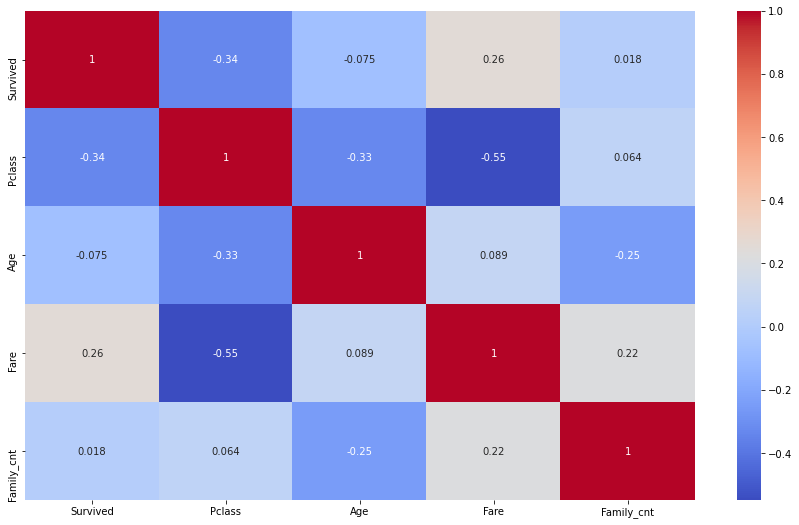

In [13]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [14]:
#sex and embarked are negitively correlated to survived. fare and survived have good positive correlation

male      577
female    312
Name: Sex, dtype: int64


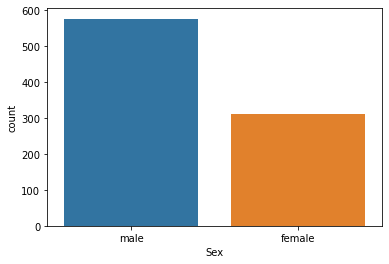

In [15]:
sns.countplot(df['Sex'])
print(df['Sex'].value_counts())

0    549
1    340
Name: Survived, dtype: int64


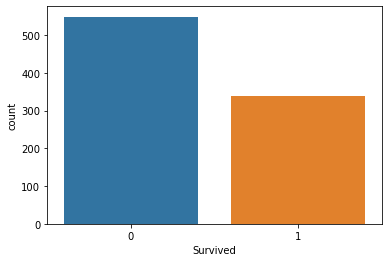

In [16]:
sns.countplot(df['Survived'])
print(df['Survived'].value_counts())

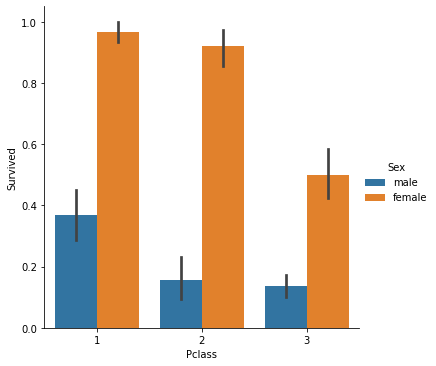

In [17]:
h=sns.catplot(x="Pclass",y="Survived",hue='Sex', data=df,kind='bar')  

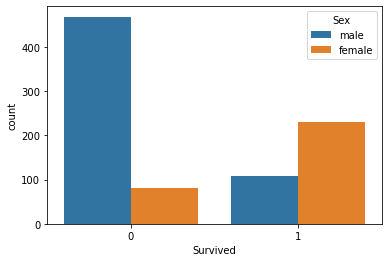

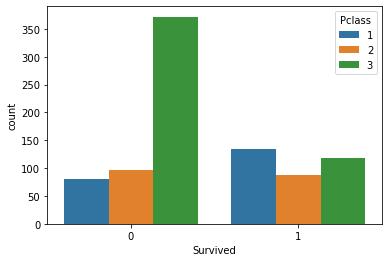

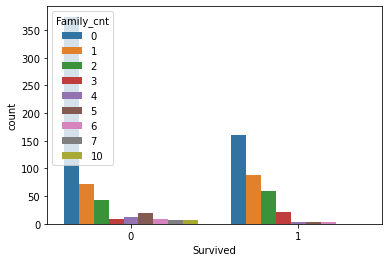

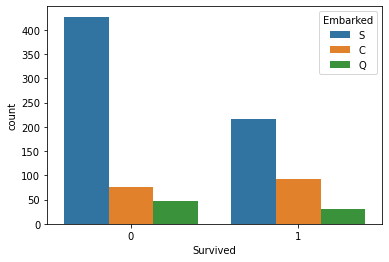

In [18]:
for col in (['Sex','Pclass','Family_cnt','Embarked']):
    plt.figure()
    sns.countplot(x='Survived', hue = col ,data= df)

### Skewness

In [19]:
#Distribution of data

In [20]:
df.skew()

Survived      0.484568
Pclass       -0.636998
Age           0.431720
Fare          4.801440
Family_cnt    2.723892
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

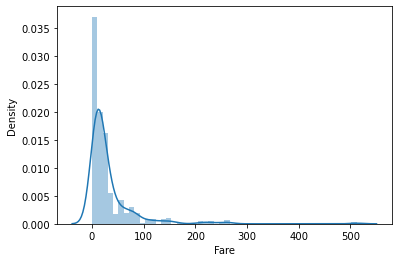

In [21]:
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

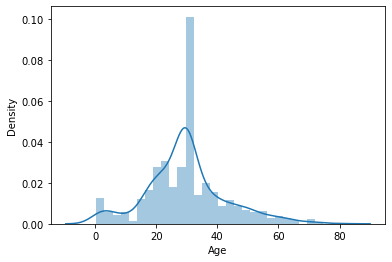

In [22]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

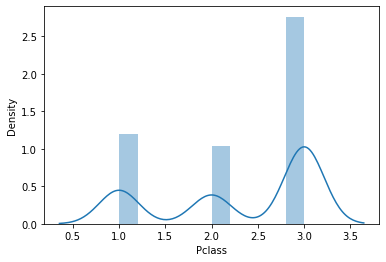

In [23]:
sns.distplot(df["Pclass"])

<AxesSubplot:xlabel='Family_cnt', ylabel='Density'>

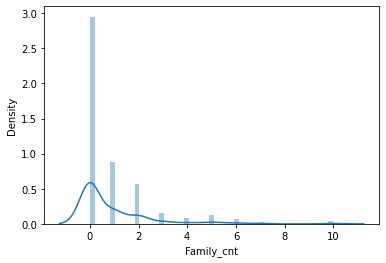

In [24]:
sns.distplot(df["Family_cnt"])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

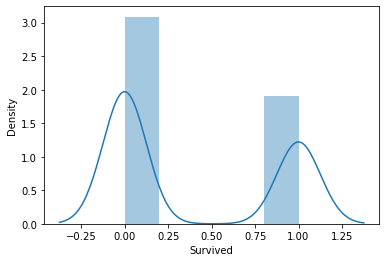

In [25]:
sns.distplot(df["Survived"])#this is target variable

Survived         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Fare             AxesSubplot(0.125,0.391471;0.227941x0.222059)
Family_cnt    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

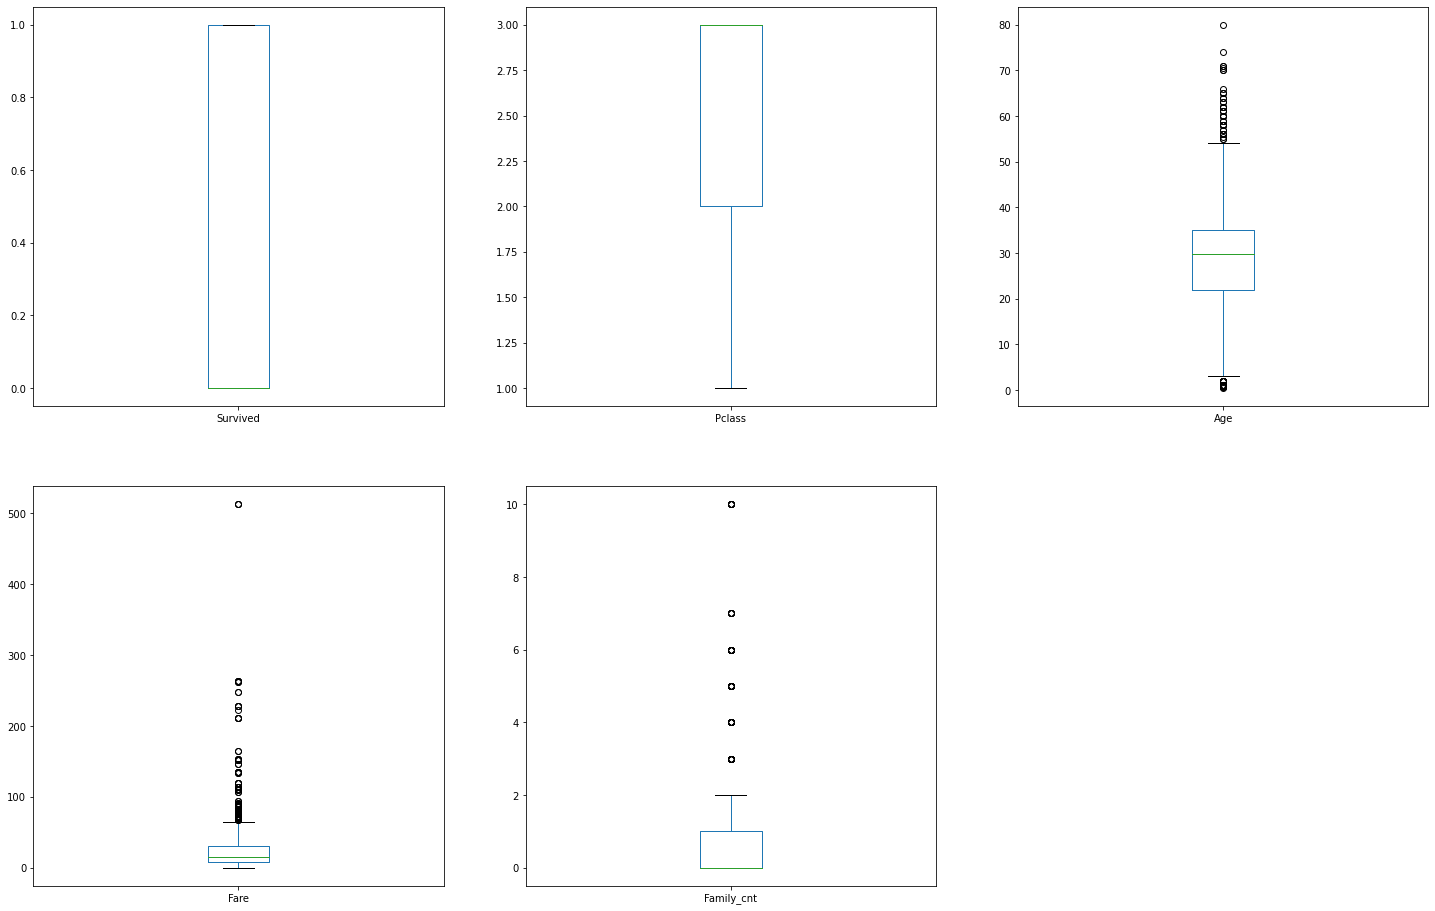

In [26]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True, layout=(3,3),figsize=(25,25))

In [27]:
#outliers are present age,fare and family_cnt

In [28]:
#sex,age and embarked are negitively correlated to survived. fare and survived have good positive correlation

### Data Pre processing

In [29]:
#dropping family count and age since they have no relationship with number of survived and contains many outliers.
cat_feat = ['Age','Family_cnt']
df.drop(cat_feat,axis=1,inplace=True)

In [30]:
df.shape

(889, 5)

In [31]:
#to convert catagorical values into numbers
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,2
1,1,1,0,71.2833,0
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2


In [32]:
 
# apply normalization techniques(min max)
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
  
 # view normalized data
print(df)

     Survived  Pclass  Sex      Fare  Embarked
0         0.0     1.0  1.0  0.014151       1.0
1         1.0     0.0  0.0  0.139136       0.0
2         1.0     1.0  0.0  0.015469       1.0
3         1.0     0.0  0.0  0.103644       1.0
4         0.0     1.0  1.0  0.015713       1.0
..        ...     ...  ...       ...       ...
886       0.0     0.5  1.0  0.025374       1.0
887       1.0     0.0  0.0  0.058556       1.0
888       0.0     1.0  0.0  0.045771       1.0
889       1.0     0.0  1.0  0.058556       0.0
890       0.0     1.0  1.0  0.015127       0.5

[889 rows x 5 columns]


In [33]:
#to remove the skewness in the dataset
from sklearn.preprocessing import power_transform
df_new = power_transform(df)

In [34]:
#creating new dataset after removing skewness and saving it to 'df'
df = pd.DataFrame(df_new , columns = df.columns)
df

,Survived,Pclass,Sex,Fare,Embarked
0,-0.786961,0.862195,0.735342,-0.951449,0.612931
1,1.270711,-1.462715,-1.359911,1.629296,-1.755242
2,1.270711,0.862195,-1.359911,-0.887968,0.612931
3,1.270711,-1.462715,-1.359911,1.319896,0.612931
4,-0.786961,0.862195,0.735342,-0.876367,0.612931
...,...,...,...,...,...
884,-0.786961,-0.599548,0.735342,-0.453470,0.612931
885,1.270711,-1.462715,-1.359911,0.573858,0.612931
886,-0.786961,0.862195,-1.359911,0.243028,0.612931
887,1.270711,-1.462715,0.735342,0.573858,-1.755242


In [35]:
#to check if skweness is lying between -0.5 to 0.5
df.skew()[np.abs(df.skew()) < 0.5].all()

True

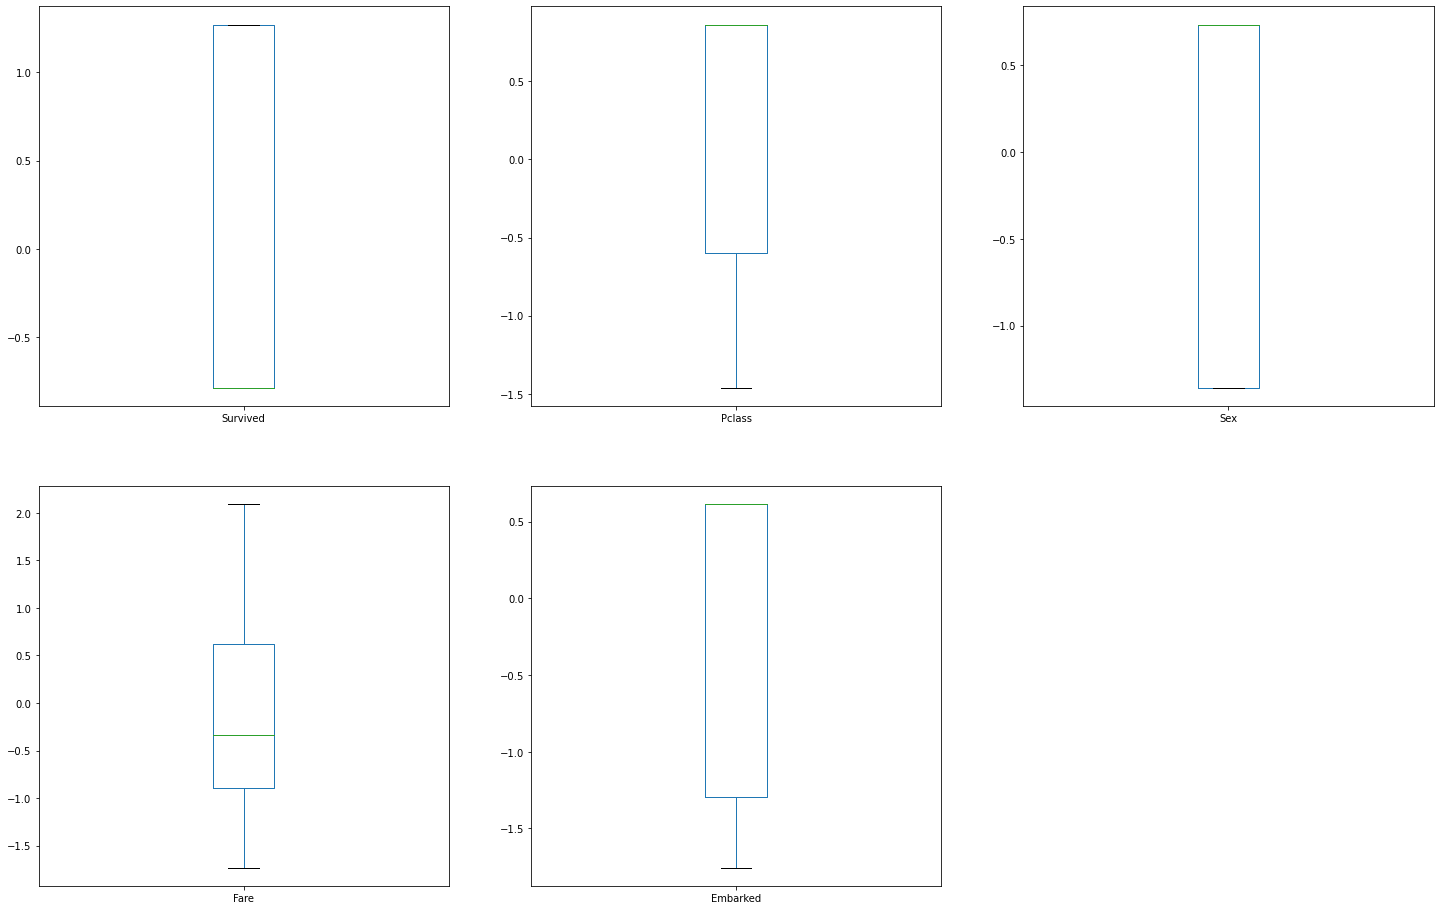

In [36]:
# to find out outliers in the dataset
df2=df.plot(kind='box',subplots=True, layout=(3,3),figsize=(25,25))

In [37]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(df)) < 3).all()

True

In [38]:
#seperate feature variable and target variable
x = df.drop (['Survived'], axis = 1)
y = df['Survived']

In [39]:
x.columns

Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')

In [40]:
y

0     -0.786961
1      1.270711
2      1.270711
3      1.270711
4     -0.786961
         ...   
884   -0.786961
885    1.270711
886   -0.786961
887    1.270711
888   -0.786961
Name: Survived, Length: 889, dtype: float64

In [41]:
#to convert y in to integer
le = LabelEncoder()
y=le.fit_transform(y)
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [42]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,889):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.8539325842696629 on Random_State 853


In [43]:
#spliting dataset into training(80%) and testing(20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=853)

In [44]:
# to check shape after spliting
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (711, 4)
shape of y_train: (711, 4)
shape of x_test: (178, 4)
shape of y_test: (178,)


### Model

In [45]:
#1.logistic regression classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 85.39325842696628
[[98  9]
 [17 54]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.86      0.76      0.81        71

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [46]:
#RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(x_train, y_train)
predlr = RF.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 85.39325842696628
[[101   6]
 [ 20  51]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.89       107
           1       0.89      0.72      0.80        71

    accuracy                           0.85       178
   macro avg       0.86      0.83      0.84       178
weighted avg       0.86      0.85      0.85       178



In [47]:
#DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(x_train, y_train)
predlr = DT.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 87.07865168539325
[[104   3]
 [ 20  51]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       107
           1       0.94      0.72      0.82        71

    accuracy                           0.87       178
   macro avg       0.89      0.85      0.86       178
weighted avg       0.88      0.87      0.87       178



In [48]:
#SVC model
svc=SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 82.58426966292134
[[104   3]
 [ 28  43]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       107
           1       0.93      0.61      0.74        71

    accuracy                           0.83       178
   macro avg       0.86      0.79      0.80       178
weighted avg       0.85      0.83      0.82       178



In [49]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(LR,x,y,cv=None).mean())
print('cross validation score of desicion tree model = ', cross_val_score(DT,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())

cross validation score of random forest model =  0.7997905160921729
cross validation score of logistic regression model =  0.7727924839713071
cross validation score of desicion tree model =  0.8144163016568273
cross validation score of standard vector machine model =  0.8054084936202628


Hence, Decision tree is the best model